##Importando Bibliotecas e Banco de dados

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Definir as ações
ticker1 = "LEVE3.SA"
ticker2 = "CSNA3.SA"
ticker3 = "GRND3.SA"
dolar = "USDBRL=X"

# Definir as datas inicial e final
data_inicial = "2017-01-01"
data_final = "2022-12-31"

# Baixar os dados históricos
dados_leve = yf.download(ticker1, data_inicial, data_final)
dados_csna = yf.download(ticker2, data_inicial, data_final)
dados_grnd = yf.download(ticker3, data_inicial, data_final)
cotacao_dolar = yf.download(dolar, data_inicial, data_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Visualizar os dados
dados_leve

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,20.790001,20.790001,20.490000,20.610001,12.983636,29500
2017-01-03,20.750000,21.730000,20.320000,21.730000,13.689198,145400
2017-01-04,21.730000,23.100000,21.540001,22.900000,14.426261,356000
2017-01-05,22.850000,23.250000,22.850000,23.250000,14.646749,298900
2017-01-06,23.219999,23.360001,22.799999,22.799999,14.363264,215400
...,...,...,...,...,...,...
2022-12-23,29.180000,30.500000,28.860001,30.180000,27.639412,195000
2022-12-26,30.370001,31.030001,29.950001,30.680000,28.097322,155700
2022-12-27,31.010000,31.010000,30.120001,30.410000,27.850050,142200


##Sobre os dados


In [ ]:
dados_leve.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1493 entries, 2017-01-02 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1493 non-null   float64
 1   High       1493 non-null   float64
 2   Low        1493 non-null   float64
 3   Close      1493 non-null   float64
 4   Adj Close  1493 non-null   float64
 5   Volume     1493 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 81.6 KB


In [ ]:
dados_csna.info()

In [ ]:
dados_grnd.info()

In [ ]:
cotacao_dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1562 entries, 2017-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1562 non-null   float64
 1   High       1562 non-null   float64
 2   Low        1562 non-null   float64
 3   Close      1562 non-null   float64
 4   Adj Close  1562 non-null   float64
 5   Volume     1562 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 85.4 KB


In [ ]:
#Dados duplicados
cotacao_dolar.index.duplicated().sum()

In [ ]:
dados_leve.index.duplicated().sum()

In [ ]:
dados_csna.index.duplicated().sum()

In [ ]:
dados_grnd.index.duplicated().sum()

In [ ]:
#Dados nulos
dados_leve.isnull().sum()
dados_grnd.isnull().sum()
dados_csna.isnull().sum()
cotacao_dolar.isnull().sum()

In [ ]:
#Dados igual a Zero
(dados_leve==0).astype(int).sum()
(dados_csna==0).astype(int).sum()
(dados_grnd==0).astype(int).sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       10
dtype: int64

In [ ]:
#Visualizando os dados iguais a Zero
dados_csna[dados_csna.Volume==0].head(10)

In [ ]:
dados_grnd[dados_grnd.Volume==0].head(10)

In [ ]:
dados_leve[dados_leve.Volume==0].head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-29,19.990000,19.990000,19.990000,19.990000,12.593055,0
2017-06-15,19.740000,19.740000,19.740000,19.740000,12.435563,0
2017-09-07,19.799999,19.799999,19.799999,19.799999,12.750449,0
2017-10-12,22.389999,22.389999,22.389999,22.389999,14.418312,0
2017-11-02,22.600000,22.600000,22.600000,22.600000,14.553544,0
2017-11-15,21.690001,21.690001,21.690001,21.690001,13.967541,0
2017-11-20,22.510000,22.510000,22.510000,22.510000,14.495586,0
2017-12-25,23.889999,23.889999,23.889999,23.889999,15.498420,0
2017-12-29,23.870001,23.870001,23.870001,23.870001,15.485442,0


In [ ]:
(cotacao_dolar==0).astype(int).sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume       1562
dtype: int64

In [ ]:
# Excluir a coluna Volume
cotacao_dolar = cotacao_dolar.drop("Volume", axis=1)

print(cotacao_dolar)

              Open      High       Low   Close  Adj Close
Date                                                     
2017-01-02  3.2532  3.279700  3.242700  3.2532     3.2532
2017-01-03  3.2841  3.289700  3.247500  3.2840     3.2840
2017-01-04  3.2635  3.264300  3.218800  3.2635     3.2635
2017-01-05  3.2149  3.227600  3.199800  3.2141     3.2141
2017-01-06  3.1975  3.211800  3.189400  3.1977     3.1977
...            ...       ...       ...     ...        ...
2022-12-26  5.1643  5.204200  5.162500  5.1643     5.1643
2022-12-27  5.2175  5.291600  5.124977  5.2175     5.2175
2022-12-28  5.2923  5.292700  5.250700  5.2923     5.2923
2022-12-29  5.2668  5.281089  5.189400  5.2668     5.2668
2022-12-30  5.2846  5.287800  5.282200  5.2846     5.2846

[1562 rows x 5 columns]


In [ ]:
dados_leve.describe()

In [ ]:
dados_csna.describe()

In [ ]:
dados_grnd.describe()

In [ ]:
cotacao_dolar.describe()

##Analise Exploratória

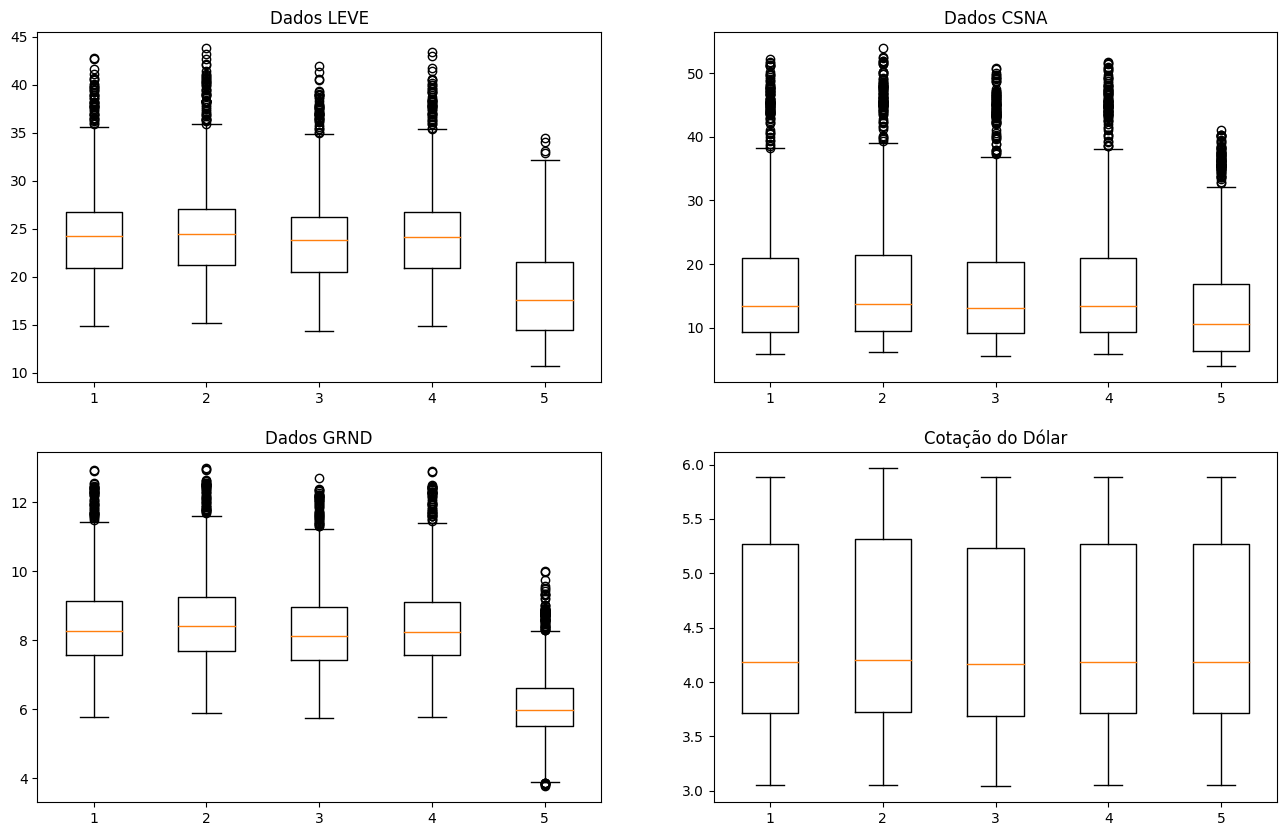

In [ ]:
# Remover a coluna de volume
dados_leve = dados_leve.drop("Volume", axis=1)
dados_csna = dados_csna.drop("Volume", axis=1)
dados_grnd = dados_grnd.drop("Volume", axis=1)
cotacao_dolar = cotacao_dolar.drop("Volume", axis=1)

# Criar os gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].boxplot(dados_leve)
axes[0, 1].boxplot(dados_csna)
axes[1, 0].boxplot(dados_grnd)
axes[1, 1].boxplot(cotacao_dolar)

# Adicionar títulos aos gráficos
axes[0, 0].set_title("Dados LEVE")
axes[0, 1].set_title("Dados CSNA")
axes[1, 0].set_title("Dados GRND")
axes[1, 1].set_title("Cotação do Dólar")

# Exibir os gráficos
plt.show()

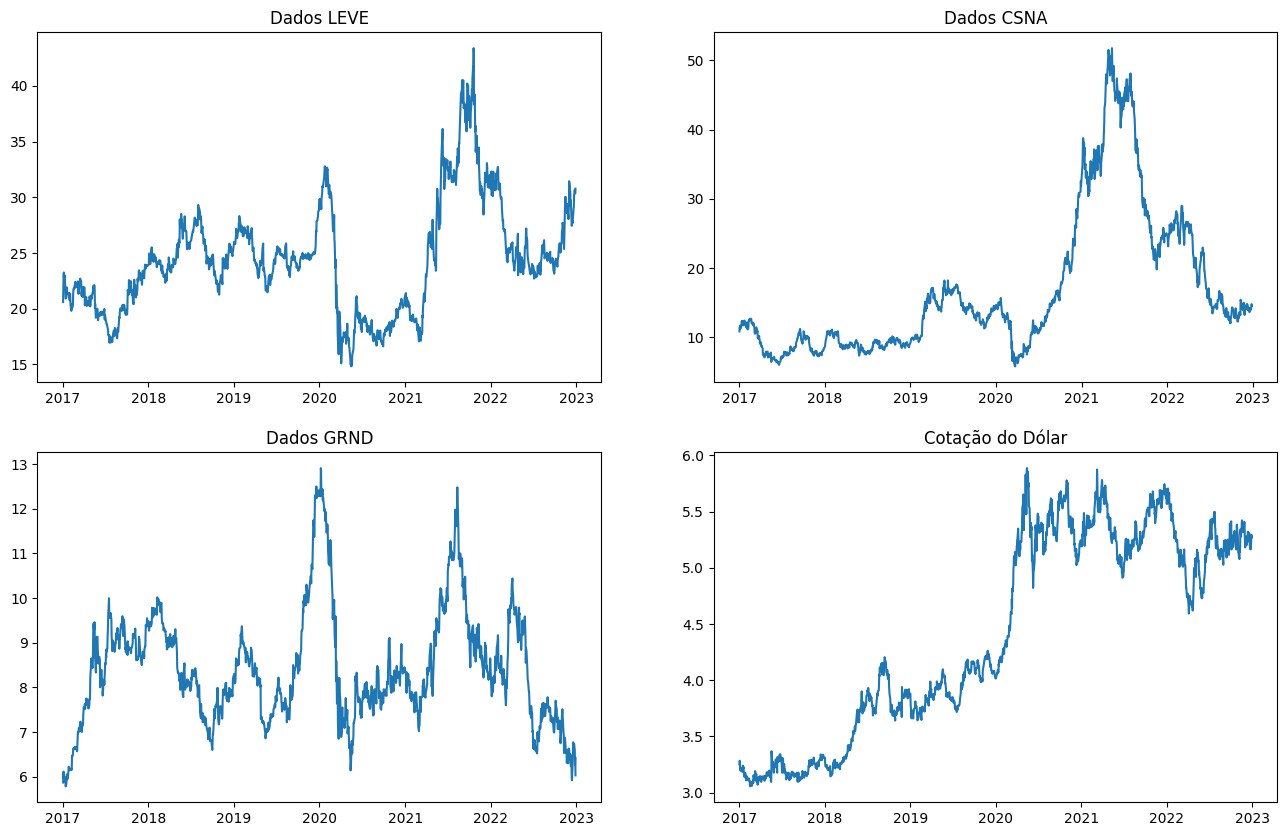

In [ ]:
# Criar os gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].plot(dados_leve["Close"])
axes[0, 1].plot(dados_csna["Close"])
axes[1, 0].plot(dados_grnd["Close"])
axes[1, 1].plot(cotacao_dolar["Close"])

# Adicionar títulos aos gráficos
axes[0, 0].set_title("Dados LEVE")
axes[0, 1].set_title("Dados CSNA")
axes[1, 0].set_title("Dados GRND")
axes[1, 1].set_title("Cotação do Dólar")

# Exibir os gráficos
plt.show()

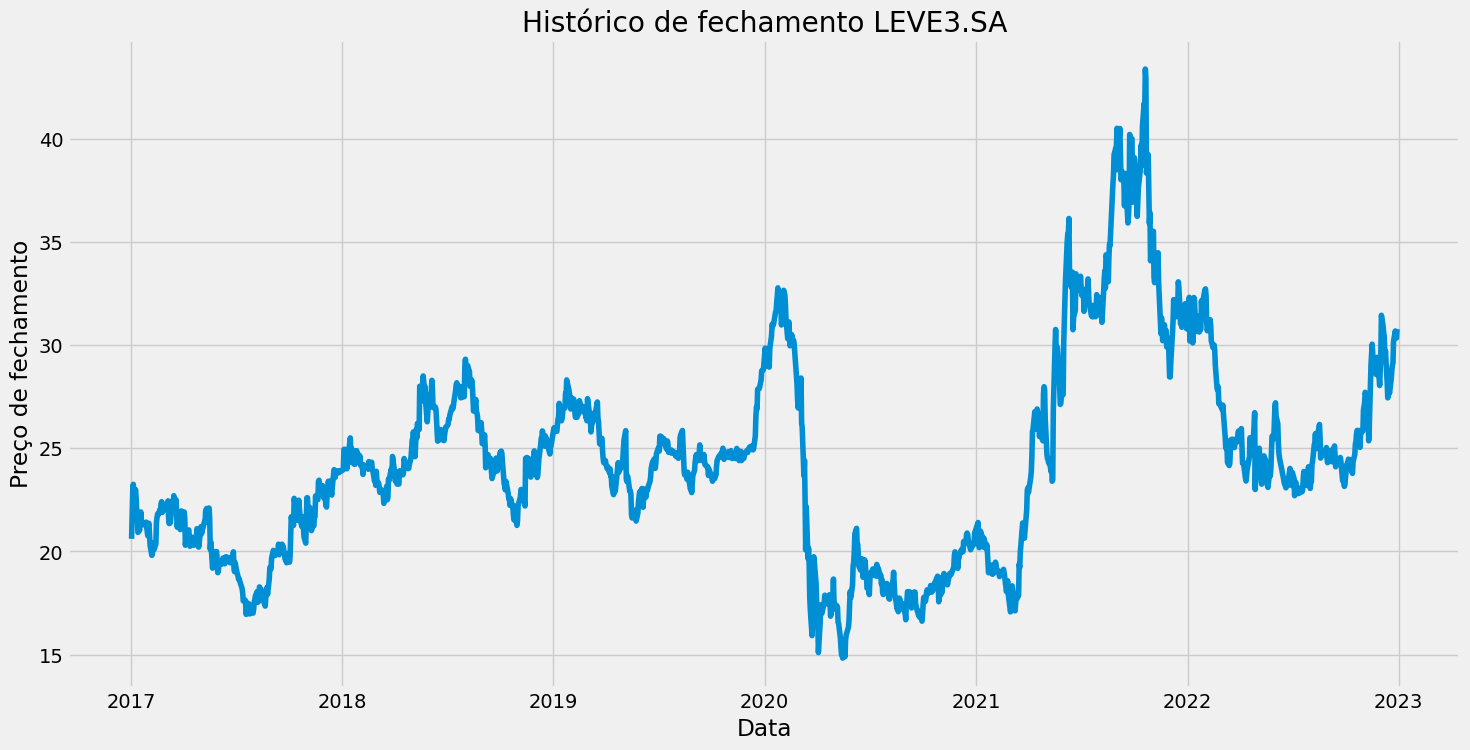

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Histórico de fechamento ' + ticker)
plt.plot(dados_leve['Close'])
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.show()

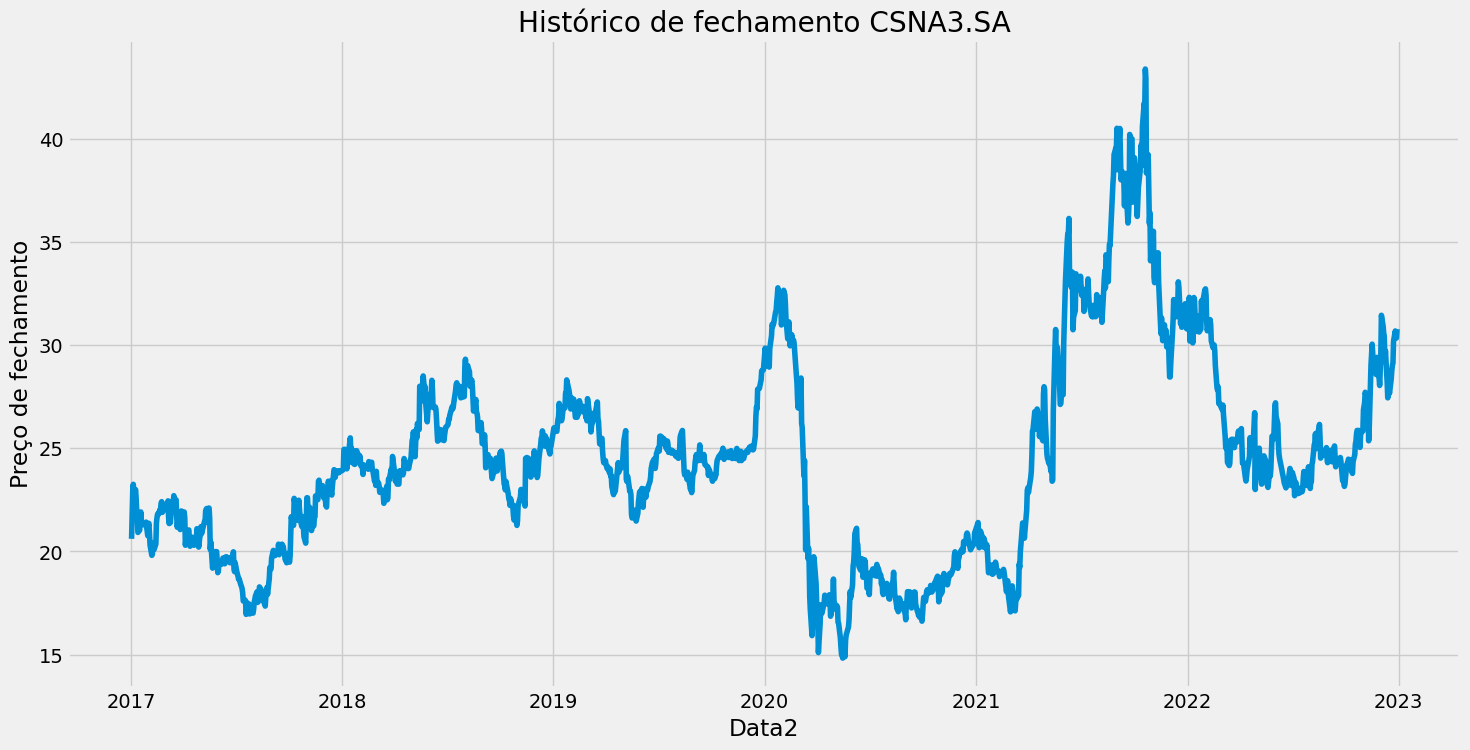

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Histórico de fechamento ' + ticker2)
plt.plot(dados_csna['Close'])
plt.xlabel('Data2')
plt.ylabel('Preço de fechamento')
plt.show()

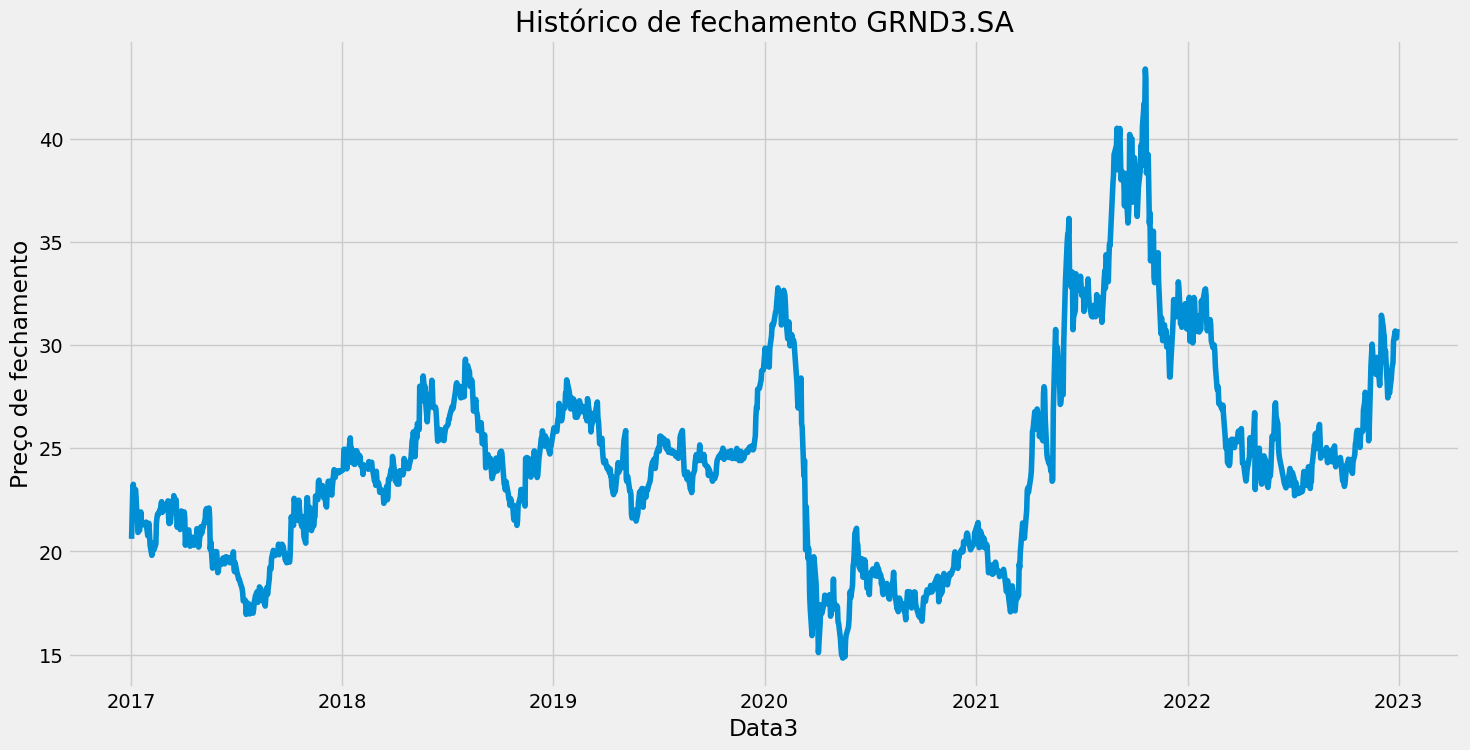

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Histórico de fechamento ' + ticker3)
plt.plot(dados_grnd['Close'])
plt.xlabel('Data3')
plt.ylabel('Preço de fechamento')
plt.show()

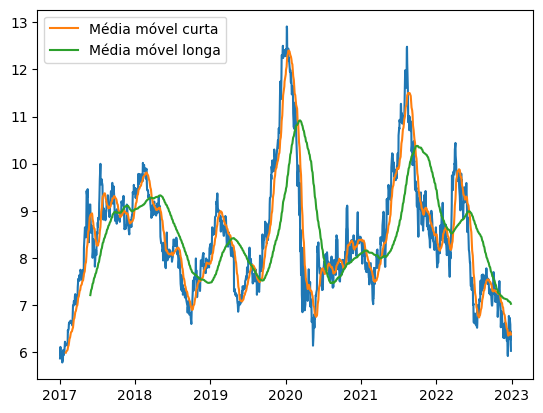

In [ ]:
# Criar as médias móveis
media_movel_curta = dados_grnd["Close"].rolling(window=20).mean()
media_movel_longa = dados_grnd["Close"].rolling(window=100).mean()

plt.plot(dados_grnd["Close"])
plt.plot(media_movel_curta, label="Média móvel curta")
plt.plot(media_movel_longa, label="Média móvel longa")
plt.legend()
plt.show()